In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from scipy.linalg import solve_triangular

import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# Problem 1

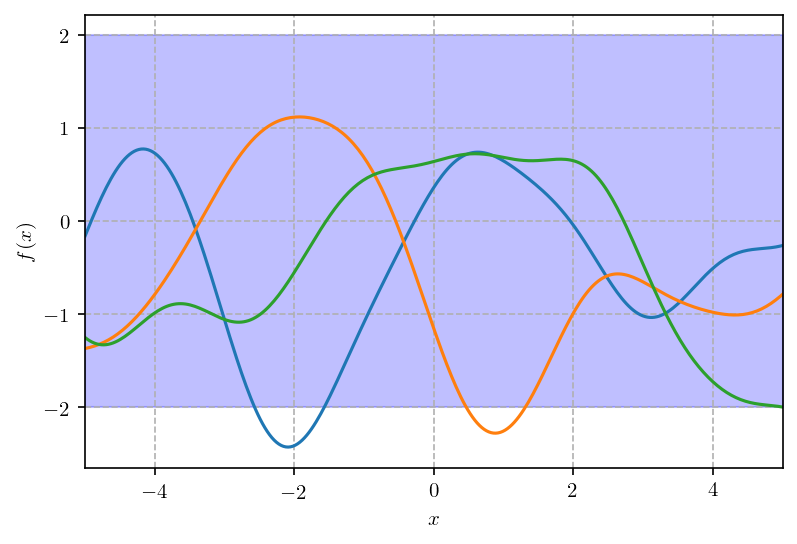

In [2]:
def squared_exp(x, y, sig_f = 1, l = 1):
    x = x.reshape((-1, 1))
    y = y.reshape((-1, 1))

    dist = cdist(x, y, metric='sqeuclidean')

    K = (sig_f **2) * np.exp(-.5 * dist/(l ** 2))
    return K

def sample(x):
    cov = squared_exp(x, x)
    var = np.diag(cov)
    mu = np.zeros_like(x)
    f = np.random.multivariate_normal(mu, cov)
    return f, np.sqrt(var)

x = np.linspace(-5,5, 300)
num_samples = 3
plt.figure(dpi=150)
for i in range(num_samples):
    f, std = sample(x)
    plt.plot(x, f)
plt.fill_between(x, -2*std, 2*std, color='b', alpha=.25)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim([-5,5])
plt.grid(linestyle='--')
plt.show()

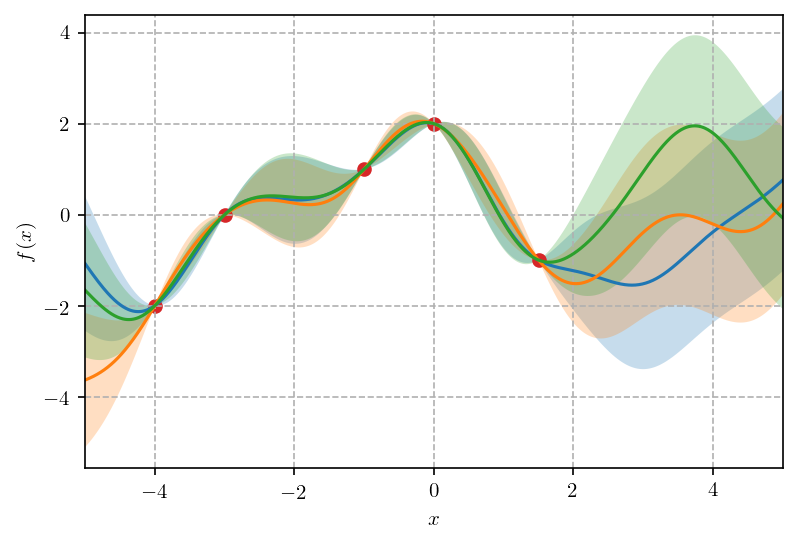

In [3]:
x_inp = np.array([-4, -3, -1, 0, 1.5])
f_target = np.array([-2, 0, 1, 2, -1])

def sample_conditional(x, f, k_cov, sigma2, x_test):
    K = k_cov(x,x)
    L = np.linalg.cholesky(K + sigma2 * np.eye(len(x)))

    k_s = k_cov(x, x_test)

    alpha = solve_triangular(L, f.reshape(-1,1), lower=True)
    alpha = solve_triangular(L.T, alpha)

    mu_test = np.squeeze(k_s.T.dot(alpha))

    v = solve_triangular(L, k_s, lower=True)

    S_test = k_cov(x_test, x_test) - v.T.dot(v)
    var = np.diag(S_test)

    f_out = np.random.multivariate_normal(mu_test, S_test)
    return f_out, np.sqrt(var)



x = np.linspace(-5,5, 1000)
num_samples = 3
plt.figure(dpi=150)
for i in range(num_samples):
    f, std = sample_conditional(x_inp, f_target, squared_exp, 0, x)
    plt.plot(x, f)
    plt.fill_between(x, -2*std + f, 2*std +f, alpha=.25)
plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$')
plt.scatter(x_inp, f_target)
plt.xlim([-5,5])
plt.grid(linestyle='--')
plt.show()


# Problem 2

Given $y = \phi(\mathbf{x})^T \mathbf{w} + \eta$ and $\mathbf{w} \sim \mathcal{N}(0, \Sigma_p)$ and $\eta \sim \mathcal{N}(0, \sigma_n^2)$, and $f(\mathbf{x}) = \phi(\mathbf{x})^T \mathbf{w}$. Given a dataset $\mathcal{D} = \{(\phi(\mathbf{x})_i, y_i)\}_i^N$, find the $\text{cov}(f(x_*), f(x_*'))$ conditioned on  $\mathcal{D}$. Denote $\mathbf{y}, X$ as the dataset.

Recall the $\text{cov}(\phi(\mathbf{x}), \phi(\mathbf{x}')) = \phi(\mathbf{x}^T) \Sigma_p \phi(\mathbf{x})' $ for the prior distribution.


\begin{equation}
\begin{bmatrix}    \mathbf{y} \\
                   \mathbf{f}_* \\ 
\end{bmatrix} \sim 
\mathcal{N}\bigg(
    \begin{bmatrix}
    0 \\
    0 \\
    \end{bmatrix},
    \begin{bmatrix}
    \Phi^T \Sigma_p \Phi + \sigma_n^2 I &  \Phi^T\Sigma_p \Phi_* \\
    \Phi_*^T \Sigma_p \Phi & \Phi_*^T \Sigma_p \Phi_*
    \end{bmatrix}
\bigg)
\end{equation}


Using the [Gaussian conditional formula](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions) 

\begin{equation}
 \mathbf{f}_* | \mathbf{y} \sim 
\mathcal{N}\bigg(
    0, \Phi_*^T \Sigma_p \Phi_* + \Phi_*^T \Sigma_p \Phi [\Phi^T \Sigma_p \Phi +  \sigma_n^2I]^{-1} \Phi^T\Sigma_p \Phi_*
\bigg)
\end{equation}

\begin{equation}
 \mathbf{f}_* | \mathbf{y} \sim 
\mathcal{N}\bigg(
    0, \Phi_*^T (\Sigma_p +  \Sigma_p \Phi [\Phi^T \Sigma_p \Phi +  \sigma_n^2I]^{-1} \Phi^T\Sigma_p) \Phi_*
\bigg)
\end{equation}

Using the [Woodbury Identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity)





\begin{equation}
 \mathbf{f}_* | \mathbf{y} \sim 
\mathcal{N}\bigg(
    0, X_*^T (\Sigma_p^{-1} + \sigma_n^{-2}XX^T)^{-1} X_*
\bigg)
\end{equation}

It follows that  $\text{cov}(f(x_*), f(x_*'))$ conditioned on $\mathcal{D}$ equal $\phi(\mathbf{x}_*)^T(\Sigma_p^{-1} + \sigma_n^{-2}XX^T)^{-1} \phi(\mathbf{x})$


# Problem 3

The Wiener process is define for $x > 0$ and has f(0) = 0. It has mean zero and a non-stationary covariance function $k(x, x') = \text{min}(x, x')$. If f(1) is conditioned to equal 0, then the covariance function is $k(x, x') = \text{min}(x, x') - xx'$ 
for  $0 \leq  x, x' \leq 1$. This process is known as a tied down Wiener process or as a Brownian Bridge.


Since Wiener process is a Gaussian process, the marginal distribution of $f(0), f(1), f(x), f(x')$ is:
\begin{equation}
\begin{bmatrix}    f(x) \\
                   f(x') \\ 
                   f(1) \\
                   f(0)  \\
\end{bmatrix} \sim 
\mathcal{N}\bigg(
    \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix},
    \begin{bmatrix}
    x & \text{min}(x, x') & x & 0\\
    \text{min}(x', x) & x' & x' & 0 \\
    x & x' & 1 & 0 \\
    0 & 0 & 0 & 0 \\
    \end{bmatrix}
\bigg)
\end{equation}

Also, we can think of the dataset consisting of $f(0) = 0$ and $f(1) = 0$

We need to find the conditional distribution of $f(x), f(x') | f(0) = 0, f(1) = 0$

Using the [Gaussian conditional formula](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions) and the [generalized inverse](https://en.wikipedia.org/wiki/Generalized_inverse),
the conditional covariance is:
\begin{equation}
\begin{bmatrix}
x & \text{min}(x, x') \\
\text{min}(x', x) & x'
\end{bmatrix}
-
\begin{bmatrix}
x & 0\\
x' & 0
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 0 
\end{bmatrix}
\begin{bmatrix}
x & x'\\
0 & 0
\end{bmatrix}

\end{equation}

\begin{equation}
\begin{bmatrix}
x - x^2 & \text{min}(x, x') - xx'\\
\text{min}(x', x) - x'x & x' - x'^2
\end{bmatrix}
\end{equation}

and the conditional mean remains at zero. From the covariance above, it follows that $k(x, x') = \text{min}(x, x') - x x'$

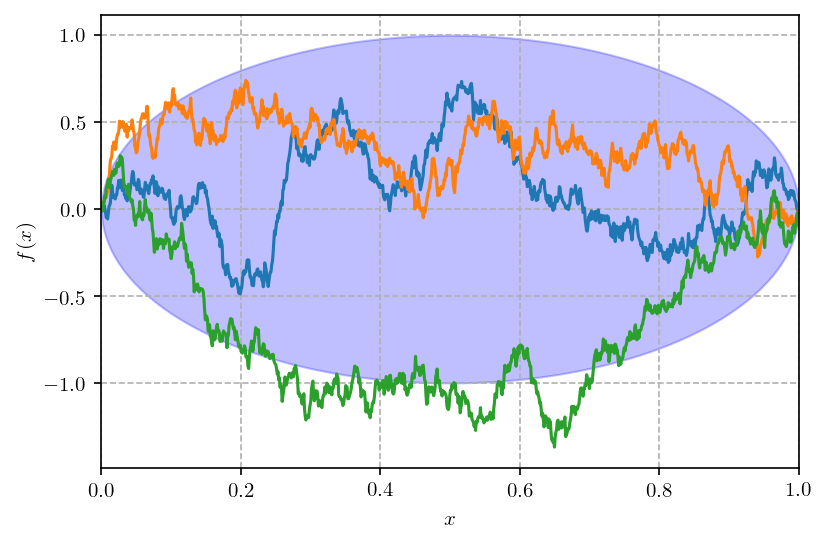

In [4]:
def tied_down_kernel(x, y):
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    k = lambda x, y: min(x,y) - x * y
    K = cdist(x, y, metric=k)
    return K

def sample_brownianBridge(x):

    cov = tied_down_kernel(x, x)
    var = np.diag(cov)
    mean = np.zeros_like(x)
    f = np.random.multivariate_normal(mean, cov)

    return f, np.sqrt(var)


x = np.linspace(0,1, 1000)
num_samples = 3
plt.figure(dpi=150)
for i in range(num_samples):
    f, std = sample_brownianBridge(x)
    plt.plot(x, f)
plt.fill_between(x, -2*std, 2*std, color='b', alpha=.25)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim([0,1])
plt.grid(linestyle='--')
plt.show()

# Problem 4


Let $\text{var}_n(f(\mathbf(x)_*))$ be the predicitve variance of a Gaussian process regression model at $\mathbf{x}_*$ given a dataset of $n$ points.

\begin{equation}
\text{var}_n(f(\mathbf(x)_*)) = k(\mathbf{x}_*, \mathbf{x}_*) + \mathbf{k}_*^T(K + \sigma_n^2I)^{-1}\mathbf{k}_*
\end{equation}

\begin{equation}
K + \sigma_n^2 I= 
\begin{bmatrix}
K_{n-1} + \sigma_n^2 I & k(\mathbf{x}_{n-1}, x_n) \\
k(x_n ,\mathbf{x}_{n-1}) & k(x_n, x_n)+\sigma_n^2 \\
\end{bmatrix}
\end{equation}

Using 




\begin{equation}
[K + \sigma_n^2 I]^{-1}= 
\begin{bmatrix}
\tilde{P} & \tilde{Q} \\
\tilde{R} & \tilde{S} \\
\end{bmatrix}
\end{equation}

$\mathbf{k}_*^T(K + \sigma_n^2I)^{-1}\mathbf{k}_* = \mathbf{k}_{n-1*}^T \tilde{P} \mathbf{k}_{n-1*}  + $
